In [1]:
import numpy as np
from study_pytorch.adaline import AdalineGD

In [2]:
import os
import pandas as pd

In [3]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("From URL:", s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv(s, header=None, encoding="utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
y = df.iloc[0:100, 4].values
print(type(y))
y = np.where(y == "Iris-setosa", 0, 1)
y

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

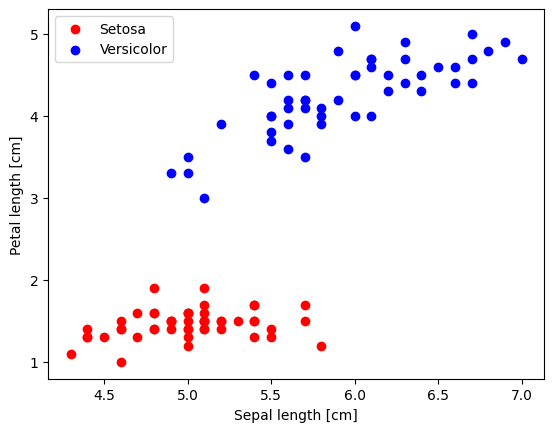

In [7]:
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="o", label="Versicolor")

plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")

plt.show()

In [8]:
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ada3 = AdalineGD(n_iter=15, eta=0.01).fit(X, y)

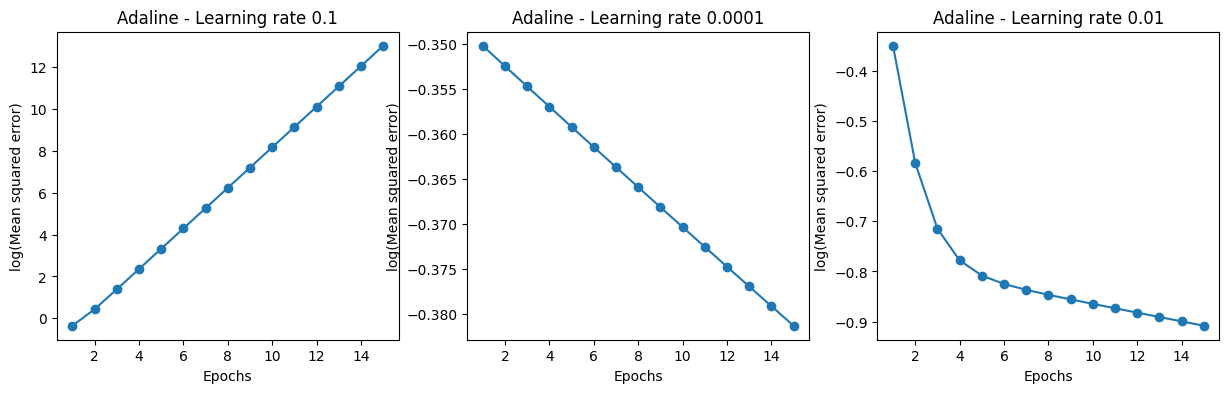

In [9]:
fix, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))


ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean squared error)")
ax[0].set_title("Adaline - Learning rate 0.1")

ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Mean squared error)")
ax[1].set_title("Adaline - Learning rate 0.0001")

ax[2].plot(range(1, len(ada3.losses_) + 1), np.log10(ada3.losses_), marker="o")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("log(Mean squared error)")
ax[2].set_title("Adaline - Learning rate 0.01")


plt.show()

In [10]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada4 = AdalineGD(n_iter=20, eta=0.5).fit(X, y)
ada5 = AdalineGD(n_iter=20, eta=0.5).fit(X_std, y)

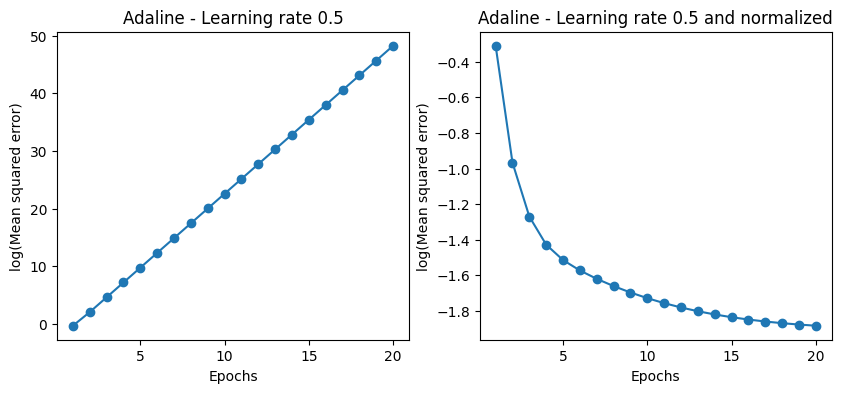

In [11]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


ax[0].plot(range(1, len(ada4.losses_) + 1), np.log10(ada4.losses_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean squared error)")
ax[0].set_title("Adaline - Learning rate 0.5")

ax[1].plot(range(1, len(ada5.losses_) + 1), np.log10(ada5.losses_), marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Mean squared error)")
ax[1].set_title("Adaline - Learning rate 0.5 and normalized")


plt.show()

In [13]:
from study_pytorch.plot_util import plot_decision_regions

In [15]:
from study_pytorch.adaline import AdalineSGD

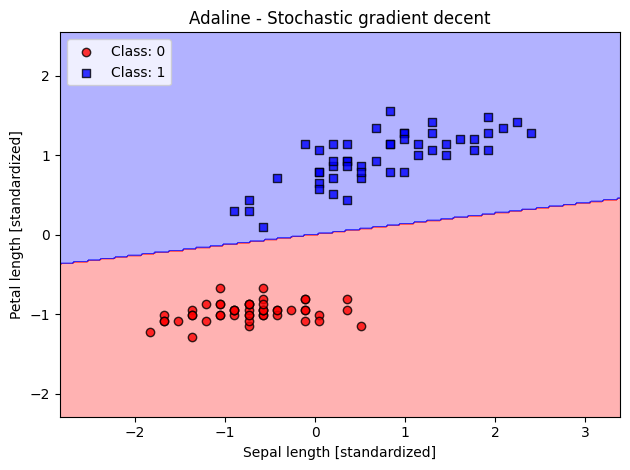

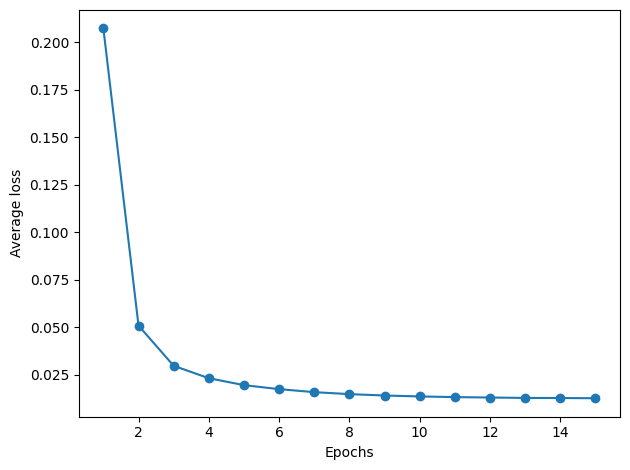

In [21]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1).fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)

plt.title("Adaline - Stochastic gradient decent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average loss")
plt.tight_layout()

plt.show()